In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import math

style.use('ggplot')

In [3]:
product=input('Enter product name :')

Enter product name :Phones


In [4]:
file = pd.ExcelFile("sales.xls")
churndf=file.parse("Orders")
churndf.head(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [5]:

fdf=file.parse("Returns")
churndf[~churndf.isin(fdf)].dropna()
churn_df=churndf.loc[churndf["Sub-Category"]==product]
churn_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
40,41,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,TEC-PH-10000486,Technology,Phones,Plantronics HL10 Handset Lifter,371.168,4,0.2,41.7564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,9974,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,TEC-PH-10004080,Technology,Phones,Avaya 5410 Digital phone,271.960,5,0.2,27.1960
9976,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.584,2,0.2,31.1980
9983,9984,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


In [6]:
cdf = churn_df[['Order ID','Order Date','Sub-Category','Sales','Quantity','Profit']]
cdf

,Order ID,Order Date,Sub-Category,Sales,Quantity,Profit
7,CA-2014-115812,2014-06-09,Phones,907.152,6,90.7152
11,CA-2014-115812,2014-06-09,Phones,911.424,4,68.3568
19,CA-2014-143336,2014-08-27,Phones,213.480,3,16.0110
35,CA-2016-117590,2016-12-08,Phones,1097.544,7,123.4737
40,CA-2015-117415,2015-12-27,Phones,371.168,4,41.7564
...,...,...,...,...,...,...
9973,US-2016-103674,2016-12-06,Phones,271.960,5,27.1960
9976,US-2016-103674,2016-12-06,Phones,249.584,2,31.1980
9983,US-2016-157728,2016-09-22,Phones,97.980,2,27.4344
9988,CA-2017-163629,2017-11-17,Phones,206.100,5,55.6470


In [14]:
cdf['Order Date'] = pd.to_datetime(cdf['Order Date'])
cdf.index = cdf['Order Date']
cdf = cdf.sort_index(ascending=True, axis=0)
df = pd.DataFrame(index=range(0,len(cdf)),columns=['Order Date', 'Sales'])
for i in range(0,len(cdf)):
    df['Order Date'][i] = cdf['Order Date'][i]
    df['Sales'][i] = cdf['Sales'][i]
df

,Order Date,Sales
0,2014-01-06 00:00:00,755.96
1,2014-01-06 00:00:00,391.98
2,2014-01-16 00:00:00,124.2
3,2014-01-20 00:00:00,699.93
4,2014-01-26 00:00:00,155.35
...,...,...
884,2017-12-25 00:00:00,90.48
885,2017-12-27 00:00:00,164.388
886,2017-12-28 00:00:00,14.85
887,2017-12-29 00:00:00,302.376


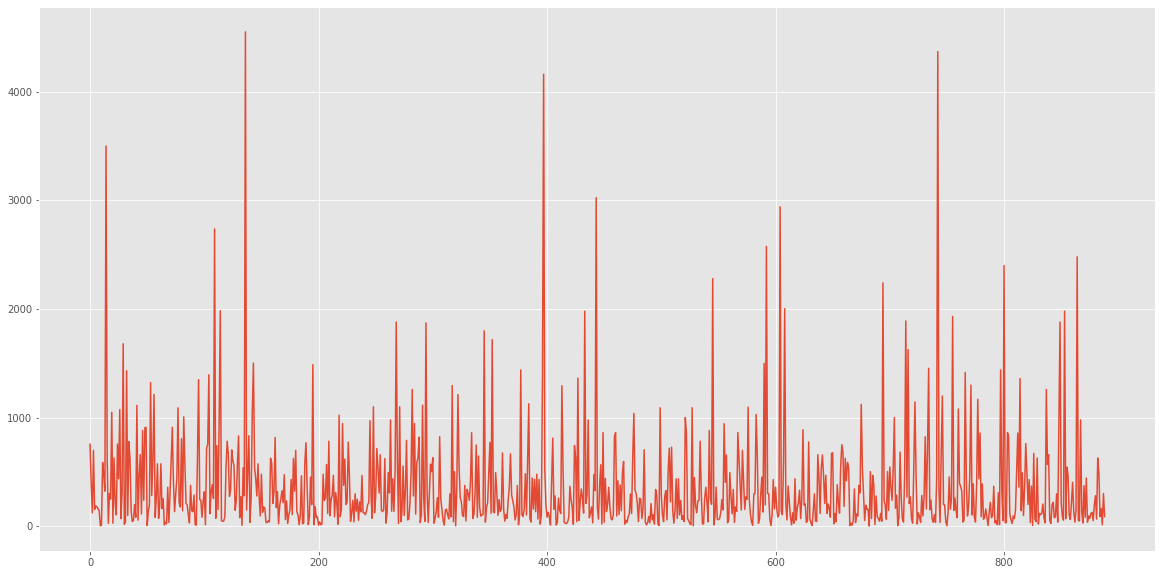

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df['Sales'], label='Sales history')

In [16]:
prob = np.random.rand(len(df)) < 0.8

train = df[prob]
test = df[~prob]

print(len(train))
print(len(test))

716
173


In [17]:
from sklearn import linear_model
LR = linear_model.LinearRegression()
x = np.asanyarray(cdf[['Order Date']])
y = np.asanyarray(train[['Sales']])



In [18]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
y = preprocessing.StandardScaler().fit(y).transform(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
lab_enc = preprocessing.LabelEncoder()
y_test = lab_enc.fit_transform(y_test)
y_train = lab_enc.fit_transform(y_train)
LR=LinerRegression()
LR.fit(x,y)

ValueError: Found input variables with inconsistent numbers of samples: [889, 716]

In [19]:
# The coefficients
print ('Coefficients:  ', LR.coef_)
print ('Intercept : Theta0', LR.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [20]:
ypred= LR.predict(x_test)
ypred = lab_enc.fit_transform(ypred)
ypred

NameError: name 'x_test' is not defined

In [ ]:

print("Mean absolute error: %.2f" % np.mean(np.absolute(ypred - y_test)))
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,ypred))

In [ ]:
print(confusion_matrix(y_test,ypred))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)*100

In [ ]:
LR.coef_

In [ ]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob